**Rank**: A classificação do jogo em termos de vendas globais. (Integer)

**Game Title**: O título do jogo. (String)

**Platform**: A plataforma em que o jogo foi lançado. (String)

**Year** : O ano em que o jogo foi lançado. (Integer)

**Genre**: O género do jogo. (String)

**Publisher**: A empresa do jogo. (String)

**North America**: As vendas do jogo na América do Norte. (Integer)

**Europe**: As vendas do jogo na Europa. (Integer)

**Japan**: As vendas do jogo no Japão. (Integer)

**Rest of World**: As vendas do jogo no resto do mundo. (Integer)

**Global**: O total de vendas globais do jogo. (Integer)

**Review**: A pontuação de avaliação do jogo. (Float)

In [237]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
games = pd.read_csv('/kaggle/input/discovering-hidden-trends-in-global-video-games/Video Games Sales.csv')

In [239]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [240]:
games.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [241]:
games.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [242]:
# "index" e "rank" dos jogos não servirá para a análise atual.
games.drop('index', axis=1, inplace=True)
games.drop('Rank', axis=1, inplace=True)

In [243]:
games.columns[games.isnull().any()]

Index(['Year', 'Publisher'], dtype='object')

In [244]:
games[games['Year'].isnull()]
#Será preciso substituir os NaN values por "Unknown" em Publisher

,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
143,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,87.00
253,RollerCoaster Tycoon,PC,NaN,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
301,FIFA Soccer 2004,PS2,NaN,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
373,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,91.00
434,LEGO Batman: The Videogame,Wii,NaN,Adventure,Warner Bros. Interactive Entertainment,1.59,0.86,0.00,0.27,2.72,80.00
523,Rock Band,X360,NaN,Misc,Electronic Arts,1.88,0.31,0.00,0.21,2.40,77.00
524,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
573,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Adventure,LucasArts,1.44,0.57,0.00,0.21,2.22,81.00
582,Call of Duty 3,Wii,NaN,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
646,Rock Band,Wii,NaN,Misc,MTV Games,1.31,0.54,0.00,0.20,2.05,80.13


In [245]:
games['Publisher'].fillna('Unknown', inplace=True)
print(games['Publisher'].isnull().sum())

0


/tmp/ipykernel_33/3979233566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Publisher'].fillna('Unknown', inplace=True)


In [246]:
#São apenas 29 valores faltando na coluna Year, mas não será nosso foco agora.

In [247]:
games.describe()

,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1878.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,2003.766773,1.258789,0.706675,0.317493,0.206471,2.489240,79.038977
std,5.895369,1.956560,1.148904,0.724945,0.343093,3.563159,10.616899
min,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,2005.000000,0.810000,0.440000,0.020000,0.130000,1.530000,81.000000
75%,2008.000000,1.375000,0.810000,0.300000,0.220000,2.540000,86.230000
max,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


*É importante ressaltar o intervalo de tempo dos dados: de 1983 a 2012*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


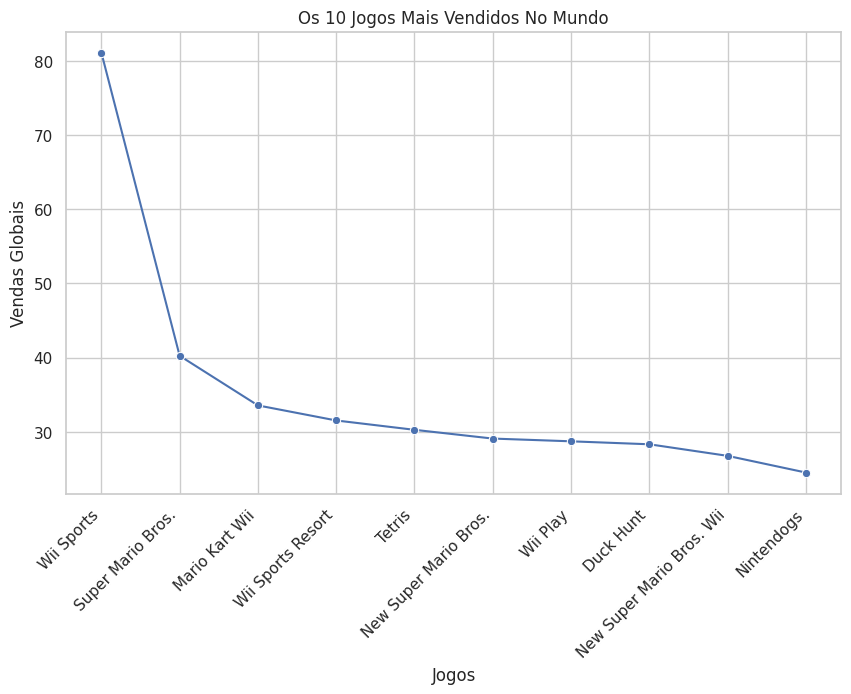

In [248]:
# Ordenar os jogos por vendas globais e selecionar os 10 jogos mais vendidos
top_10_games = games.sort_values(by='Global', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Game Title', y='Global', data=top_10_games, marker='o')

plt.title('Os 10 Jogos Mais Vendidos No Mundo')
plt.xlabel('Jogos')
plt.ylabel('Vendas Globais')
plt.xticks(rotation=45, ha='right')

plt.show()

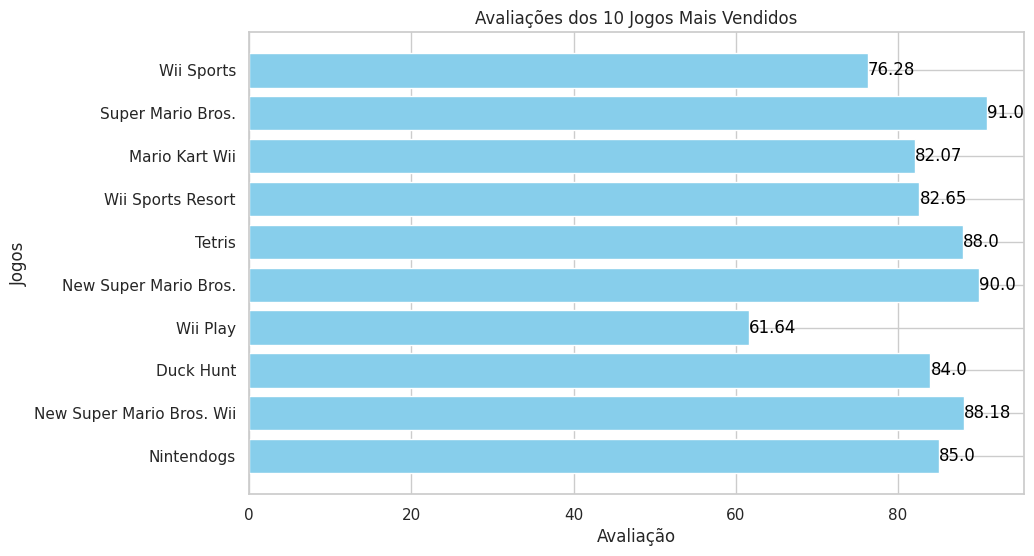

In [249]:
# Ordenar os jogos por vendas globais e selecionar os 10 jogos mais vendidos
top_10_games = games.sort_values(by='Global', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_games['Game Title'], top_10_games['Review'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
    f'{bar.get_width()}', ha='left', va='center', color='black')

plt.title('Avaliações dos 10 Jogos Mais Vendidos')
plt.xlabel('Avaliação')
plt.ylabel('Jogos')

plt.gca().invert_yaxis()  
plt.show()

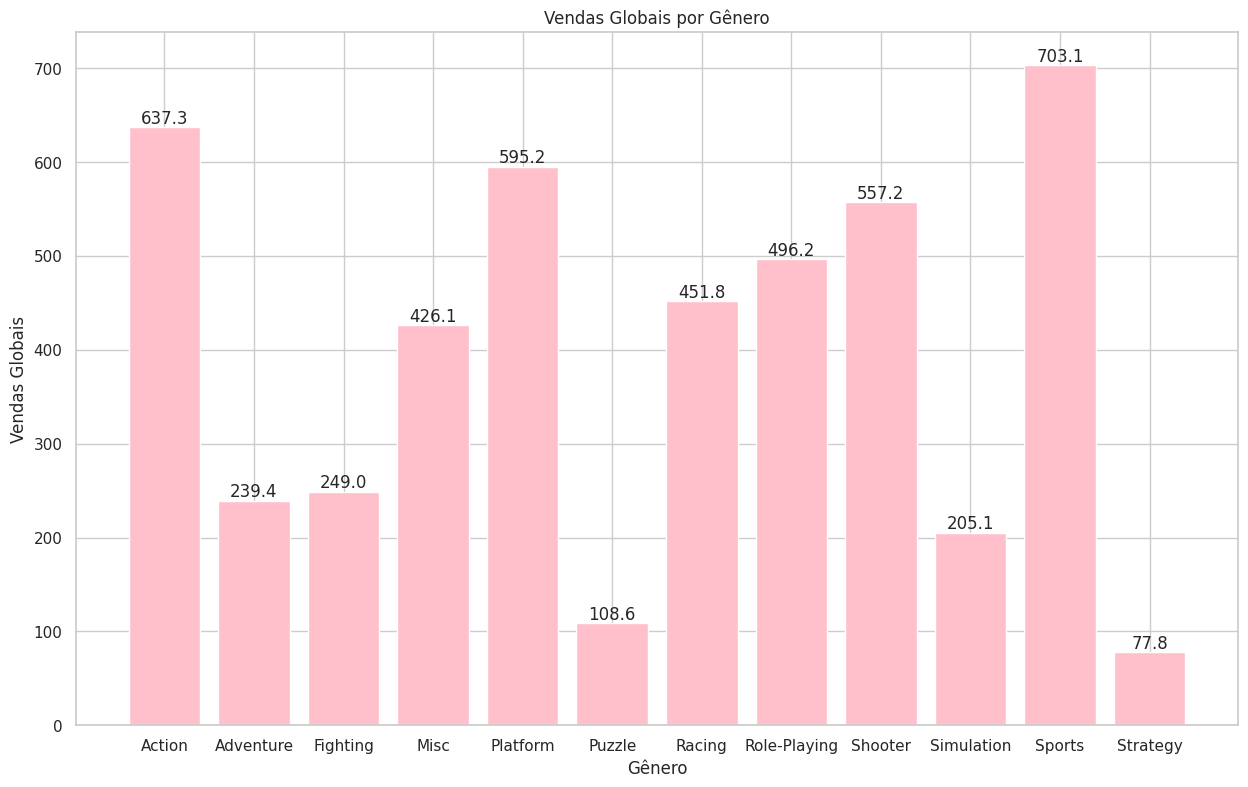

In [250]:
# um gráfico indicando as vendas globais por genero

# Agrupar por 'Genre' e somar as vendas globais
genre_sales = games.groupby('Genre')['Global'].sum().reset_index().round(1)

plt.figure(figsize=(15, 9))
bars= plt.bar(genre_sales['Genre'], genre_sales['Global'], color='pink')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
    round(bar.get_height(), 2), ha='center', va='bottom')

plt.title('Vendas Globais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais')

plt.show()

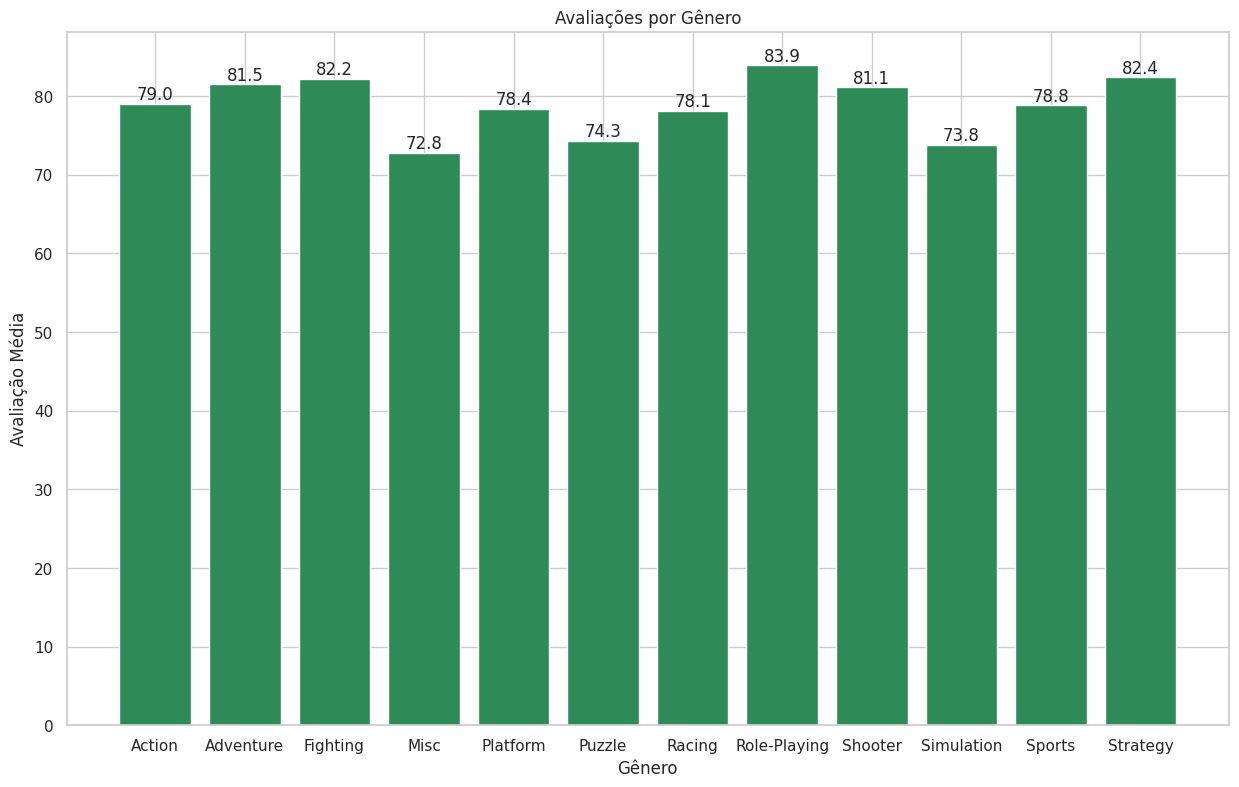

In [251]:
# o gráfico demonstra a média das avaliações conforme o genero

# Agrupar por 'Genre' e calcular a média das avaliações
genre_reviews = games.groupby('Genre')['Review'].mean().reset_index().round(1)

plt.figure(figsize=(15, 9))
bars = plt.bar(genre_reviews['Genre'], genre_reviews['Review'], color='seagreen')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.title('Avaliações por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Avaliação Média')

plt.show()

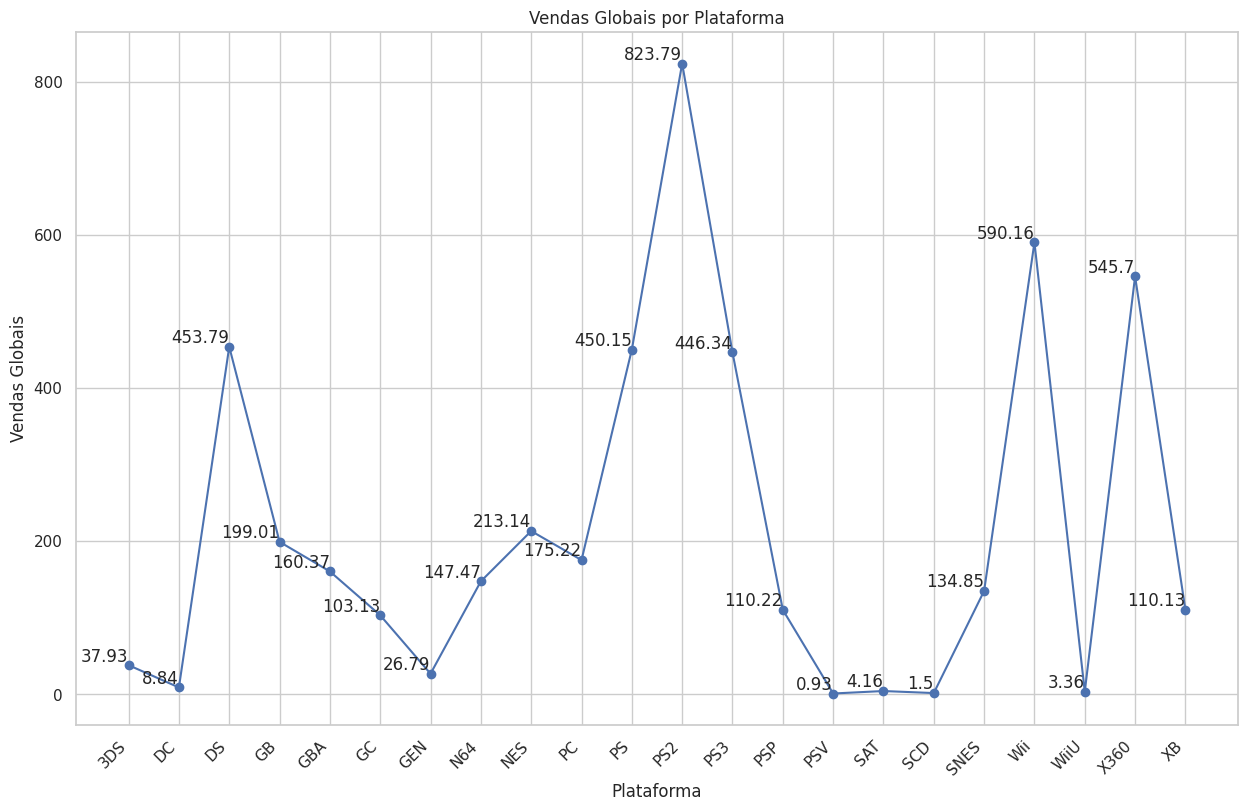

In [252]:
# Agrupar as vendas globais por plataforma
platform_sales = games.groupby('Platform')['Global'].sum().round(2)


plt.figure(figsize=(15, 9))
plt.plot(platform_sales.index, platform_sales.values, marker='o')

for x, y in zip(platform_sales.index, platform_sales.values):
    plt.text(x, y, f'{y}', ha='right', va='bottom')

plt.title('Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')
plt.xticks(rotation=45, ha='right')
plt.show()

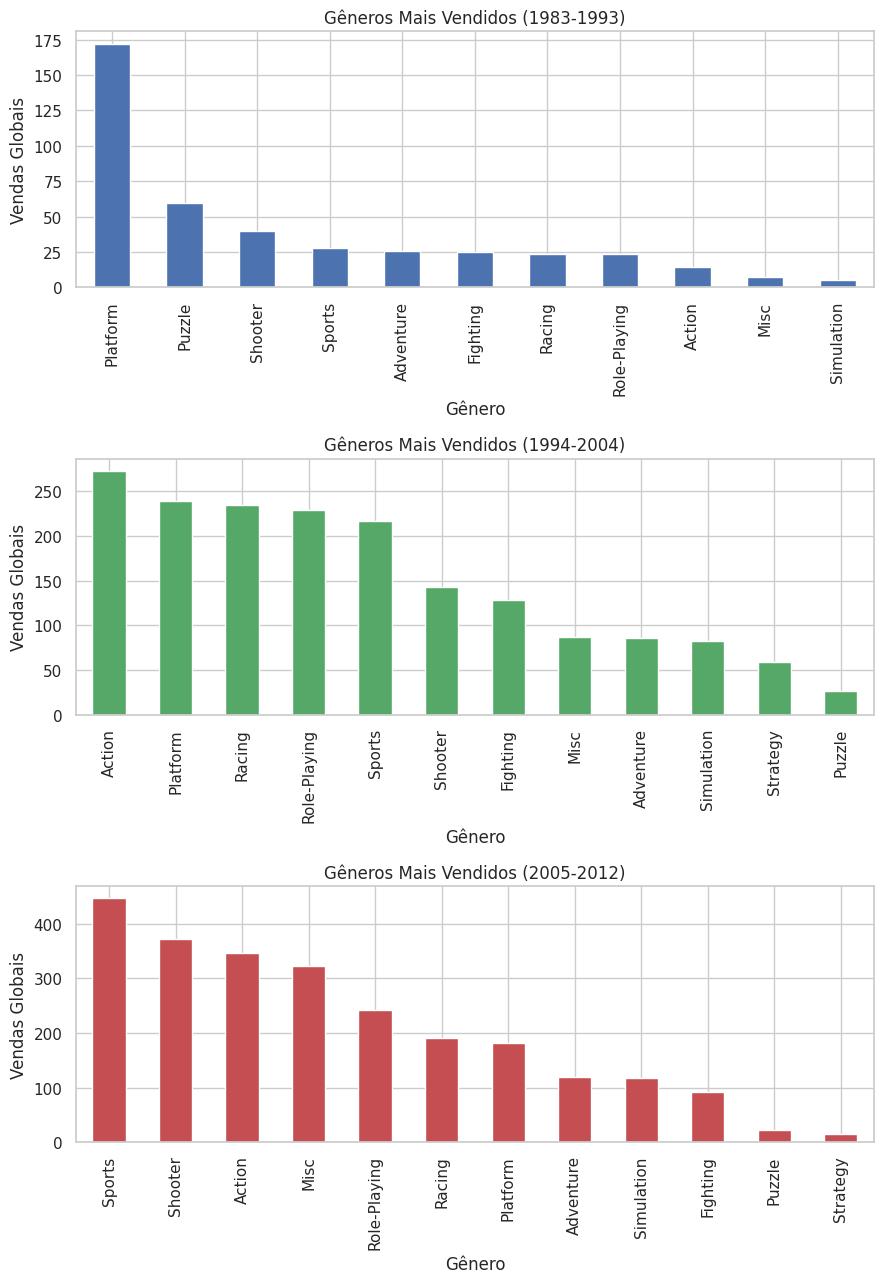

In [253]:
# Filtrar os dados por intervalo de tempo
generos_1983_1993 = games[(games['Year'] >= 1983) & (games['Year'] <= 1993)]
generos_1994_2004 = games[(games['Year'] >= 1994) & (games['Year'] <= 2004)]
generos_2005_2012 = games[(games['Year'] >= 2005) & (games['Year'] <= 2012)]

# Agrupar e somar as vendas por gênero para cada intervalo de tempo
intervalo_1983_1993 = generos_1983_1993.groupby('Genre')['Global'].sum().sort_values(ascending=False)
intervalo_1994_2004 = generos_1994_2004.groupby('Genre')['Global'].sum().sort_values(ascending=False)
intervalo_2005_2012 = generos_2005_2012.groupby('Genre')['Global'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(9, 13))

intervalo_1983_1993.plot(kind='bar', ax=axes[0], color='b')
axes[0].set_title('Gêneros Mais Vendidos (1983-1993)')
axes[0].set_ylabel('Vendas Globais')
axes[0].set_xlabel('Gênero')

intervalo_1994_2004.plot(kind='bar', ax=axes[1], color='g')
axes[1].set_title('Gêneros Mais Vendidos (1994-2004)')
axes[1].set_ylabel('Vendas Globais')
axes[1].set_xlabel('Gênero')

intervalo_2005_2012.plot(kind='bar', ax=axes[2], color='r')
axes[2].set_title('Gêneros Mais Vendidos (2005-2012)')
axes[2].set_ylabel('Vendas Globais')
axes[2].set_xlabel('Gênero')

plt.tight_layout()
plt.show()

In [254]:
#Transformar categóricas em numéricas
games['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Puzzle', 'Misc', 'Shooter',
       'Simulation', 'Role-Playing', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [255]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')

In [256]:
ohetransform = ohe.fit_transform(games[['Genre']])
ohetransform

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [257]:
games = pd.concat([games, ohetransform], axis = 1).drop(columns = ['Genre'])

In [258]:
games.columns

Index(['Game Title', 'Platform', 'Year', 'Publisher', 'North America',
       'Europe', 'Japan', 'Rest of World', 'Global', 'Review', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [259]:
# treinar um modelo para prever vendas no japão, significa que lidamos com uma tarefa de regressão

X = games[['Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
           'North America', 'Europe', 'Rest of World', 'Global']]

y = games['Japan']

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [261]:
len(X_train), len(y_train) #o tamanho dos dados de treino = 70%

(1334, 1334)

In [262]:
len(X_test), len(y_test) # o tamanho dos dados de teste = 30%

(573, 573)

In [263]:
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=40)

In [264]:
y_pred = model.predict(X_test)

In [265]:
from sklearn.metrics import mean_squared_error, r2_score

In [266]:
mean_squared_error(y_pred, y_test)

0.09930209649214647

In [267]:
r2_score(y_pred, y_test)

0.6997252514011325

In [268]:
# O dicionário forma a grade de hyperparâmetros para aprimorar nosso modelo

param_grid ={
    'n_estimators' : [100, 190, 230],
    'max_depth' : [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2 , 4]
}

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
model_cv = GridSearchCV(estimator = model, param_grid = param_grid, cv=2, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [271]:
model_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 190, 230]},
             scoring='neg_mean_squared_error')

In [272]:
y_preds = model_cv.predict(X_test)

In [273]:
mean_squared_error(y_preds, y_test)

0.09952966622129406

In [274]:
r2_score(y_preds, y_test)

0.7039815848729045

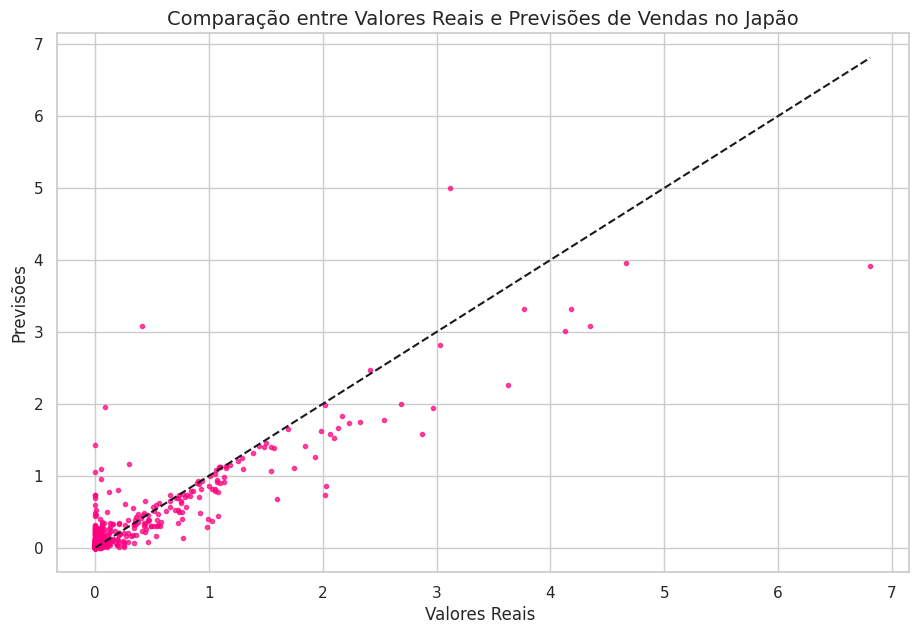

In [275]:
plt.figure(figsize=(11, 7))
plt.scatter(y_test, y_preds, color='#FF007F', alpha=0.7, s = 9)

# Plotar uma linha diagonal de comparação
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)

# Adicionar rótulos e título
plt.xlabel('Valores Reais ', fontsize=12)
plt.ylabel('Previsões', fontsize=12)
plt.title('Comparação entre Valores Reais e Previsões de Vendas no Japão', fontsize=14)

# Mostrar o gráfico
plt.show()

In [276]:
#Indica uma linearidade postiva, mas há um "overplotting" concentrado entre 0 e 1
# Além disso, os pontos de dispersão abaixo da linha indicam que a previsão é menor em relação aos valores reais